<a href="https://colab.research.google.com/github/PeteeDK/Colab-Notebooks/blob/main/Kopi_af_Classfication_MNIST_Exercise_GENAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 3 – Classification - Based on this chapter**

_This notebook contains an excerpt of the sample code and solutions to the exercises in chapter 3._

# Setup

This project requires Python 3.7 or above:

In [ ]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Let's define the default font sizes to make the figures prettier:

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# MNIST

Load the MNIST dataset

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

How to get the description of the dataset

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

How to get information about the structure of the data set

In [ ]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Assign learning data to X and labels to y

In [ ]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Extract information about the data

In [ ]:
X.shape

(70000, 784)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

In [ ]:
28 * 28

784

Demoing the bitmap structure

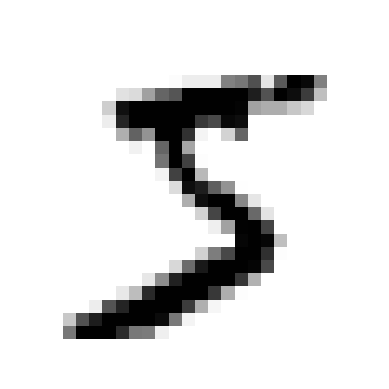

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)

plt.show()

In [ ]:
y[0]

'5'

Extracting training and test sets

In [ ]:
#X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, X_test, y_train, y_test = X[:10000], X[68000:], y[:10000], y[68000:] #For better execution time

X[:10000] betyder at det er fra 0 til 10000 som trænes på.


X[68000:] betyder at der er fra 68000 til enden af arrayet som testes på.


# Training a Binary Classifier

###Excercise(s):

1. Evaluate the 'shapes' of 'X_train', 'X_test', 'y_train' and 'y_test' by making code cells as below.

In [ ]:
##Start with this one
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(10000, 784)
(2000, 784)
(10000,)
(2000,)


2. What does that tell us?

(10000, 784)

10000 = er antallet af elementer/features som den træner på.

784 = er antallet af værdier i et given element/feature.

(2000, 784)

2000 = er antallet af elementer/features som den tester på.

###Extracting binary labels - true or false

In [ ]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

###Excercise(s):

1. Evaluate 'y_train_5' and 'y_test_5' in code cells as done below

In [ ]:
y_train_5

array([ True, False, False, ..., False, False, False])

Det første element/feature i trænings sættet er true hvilket betyder at maskinen læser det som et 5 tal

In [ ]:
y_test_5

array([False, False, False, ..., False,  True, False])

Det første element/feature i test sættet er false hvilket betyder at maskinen læser det som om det ikke er et 5 tal

2. Explain the results

#Applying a classifier


 In this case a SGDClassifier and we let it learn from training data with the fit method

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Let it predict 'some_digit' in this case a '5'

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

## Confusion Matrix

Establish the confusion matrix for the training data

In [ ]:
y_train_pred = sgd_clf.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[8846,  291],
       [  46,  817]])

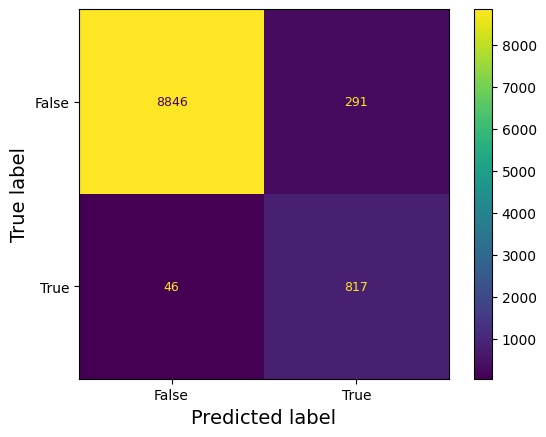

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_pred)
plt.show()

###Excercise(s)

1. Establish the confusion matrix on the **test set** in some code cells below

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_5, y_test_pred)
cm

array([[1764,   67],
       [  13,  156]])

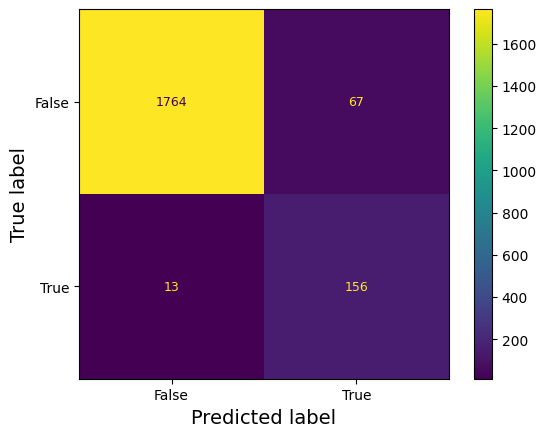

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_test_5, y_test_pred)
plt.show()

In [ ]:
##Start with this
y_test_pred = sgd_clf.predict(X_test)

Establish the confusion matrix with perfect predictions

In [ ]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[9137,    0],
       [   0,  863]])

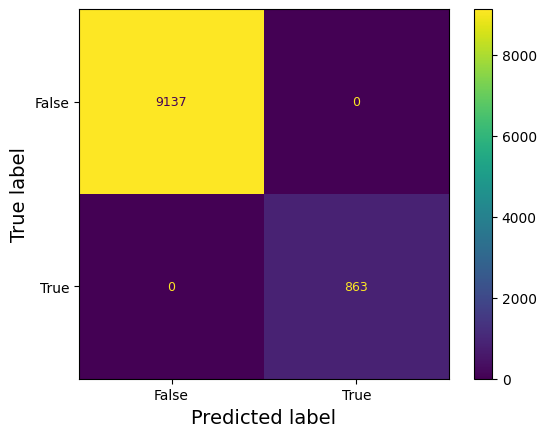

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_perfect_predictions)
plt.show()

## Accuracy, Precision and Recall

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score



Evaluate accuracy

In [ ]:
#Train
accuracy_score(y_train_5, y_train_pred) ## (TP+TN)/(TP+FP+TN+FN)

0.9663

In [ ]:
#Test
accuracy_score(y_test_5, y_test_pred)

0.96

Evaluate precission

In [ ]:
#Train
precision_score(y_train_5, y_train_pred)

0.7373646209386282

In [ ]:
#Test
precision_score(y_test_5, y_test_pred)

0.6995515695067265

Evaluate recall

In [ ]:
#Train
recall_score(y_train_5, y_train_pred)

0.9466975666280417

In [ ]:
#Test
recall_score(y_test_5, y_test_pred)

0.9230769230769231

###Excercises

1. Explain the 3 scores accuracy, precision and recall in the current context

1. Explain the 3 scores accuracy, precision and recall in the current context
Accuracy fortæller os hvor god modellen er til at putte data i de rigtige kasser, både sande sande og sande falske.
Precision fortæller os sammenhængen imellem hvor mange det bliver placeret som "5" vs. hvor mange det bliver markeret som falske positiver altså 5 der ikke var 5.
Recall er hvor mange true positives der er fundet af den totalle mængde af 5 i vores datasæt. Dette kræver at vi arbejder med labelet data.

2. Establish evaluation of these scores for our **test data set** in code cells below

3. Does our digit recognition solution perform better or worse on test data compared to training data?

In [ ]:
print("accuracy")
#træning
print("Train:",accuracy_score(y_train_5, y_train_pred))
#test
print("Test:",accuracy_score(y_test_5, y_test_pred))

print("")
print("precision")
#træning
print("Train:",precision_score(y_train_5, y_train_pred))
#test
print("Test:",precision_score(y_test_5, y_test_pred))

print("")
print("recall")
#træning
print("Train:",recall_score(y_train_5, y_train_pred))
#test
print("Test:",recall_score(y_test_5, y_test_pred))

accuracy
Train: 0.9663
Test: 0.96

precision
Train: 0.7373646209386282
Test: 0.6995515695067265

recall
Train: 0.9466975666280417
Test: 0.9230769230769231


4. What does that mean?

Train sæt er større vil den have under udarbejdelsen kunne forbedre sig selv og der ved bliver train sæt bedre

###Questions

1. What is a binary classifier?
    

En machine learning model der skal opdele noget i to katagorier, det kan være ja eller nej, true or false.

2. Why is the data set split into training and test sets?
    

Så vi kan adskille vores data sæt, vi kan dermed træne vores model på et specifikt sæt og holde det adskilt fra det datasæt som vi så vil teste det på. Dermed undgår vi at vores model kan se alt for god ud hvis den testede på det samme datasæt som den har trænet på.

3. What is a confusion matrix?
    

En matrix der anvendes til at angive hvordan en klassifikation model har klaret "opgaven" når vi arbejder med labelet data.
Den opdeler modellen svar udfra de labels som er på dataen, de individuelle katagorier er True positives (Sande positiver) True Negatives (Sande negativer) False positives (Falske positiver) og False Negatives (falske negativer).

4. Explain the values (TP, TN, FP, FN) in your confusion matrix?

Værdierne angiver hvor mange som modellen har angivet korrekt ud af det markerede data. Som enten TP (156) eller TN (1764) det er dem som modellen har ramt korrekt med. Derimod er FP (67) og FN(13) der hvor vores model har ramt ved siden af og enten angivet tallet som et 5 tal når det ikke var, eller angivet noget der var et 5 tal som noget andet.